# ***Est ce que le faite d'acceuillir les jeux olympics ameliore les perf ?***
**C'est la question a laquelle ce notebook va repondre**


In [ ]:
# Importing the packages that i will use in this project
import pandas as pd # for reading and manipulating dataframes
import numpy as np # for the use of wide range of Math and logic functions
import matplotlib.pyplot as plt # for ploting
import seaborn as sns # for beautiful ploting
import statsmodels # for statistical teting and modeling
import os # for the shell functions

***Connecting colab to my Google drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the data

In [ ]:
# changing the working directory to the specified location between the quotation marks
os.chdir("/content/drive/MyDrive/HETIC") 

In [ ]:
ls # Checking the directory content


 athlete_events.csv      EntriesGender.gsheet   Teams.gsheet
 athlete_events.gsheet   EntriesGender.xlsx     Teams.xlsx
 Athletes.gsheet         Medals.gsheet         'Tokyo 2021 dataset.csv'
 Athletes.xlsx           Medals.xlsx           'Tokyo 2021 dataset.gsheet'
 Coaches.gsheet          noc_regions.csv
 Coaches.xlsx            noc_regions.gsheet


In [ ]:
pwd # checking in wich drectory i am ! Just to make sure and play it as a pro :p

'/content/drive/MyDrive/HETIC'

In [ ]:

# Again an another bunch of lines of code just to test what I have as content in my directory
for dirname, _, filenames in os.walk('/content/drive/MyDrive/HETIC'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/HETIC/Athletes.xlsx
/content/drive/MyDrive/HETIC/Coaches.xlsx
/content/drive/MyDrive/HETIC/EntriesGender.xlsx
/content/drive/MyDrive/HETIC/Tokyo 2021 dataset.csv
/content/drive/MyDrive/HETIC/Teams.xlsx
/content/drive/MyDrive/HETIC/Medals.xlsx
/content/drive/MyDrive/HETIC/noc_regions.csv
/content/drive/MyDrive/HETIC/athlete_events.csv
/content/drive/MyDrive/HETIC/noc_regions.gsheet
/content/drive/MyDrive/HETIC/Tokyo 2021 dataset.gsheet
/content/drive/MyDrive/HETIC/Athletes.gsheet
/content/drive/MyDrive/HETIC/Coaches.gsheet
/content/drive/MyDrive/HETIC/Medals.gsheet
/content/drive/MyDrive/HETIC/EntriesGender.gsheet
/content/drive/MyDrive/HETIC/Teams.gsheet
/content/drive/MyDrive/HETIC/athlete_events.gsheet


In [ ]:
# The real deal starts now 
# Importing the data starts now buckle up 
df_ath = pd.read_csv("athlete_events.csv")
df_tok = pd.read_csv("Tokyo 2021 dataset.csv")
# for now I only need 2 dataframes

In [ ]:
df_ath.head(3) # Checking the data content for athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [ ]:
df_tok.head(3)

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN


# Data preprocessing

Now I will only select the games that were played in the summer



*   ***athlete_events*** is the data in consideration
*   the selection will be based on a column named ``Season``
* The ***Tokyo 2021 dataset*** is already for the tokyo summer olympics



In [ ]:
df_summer = df_ath[df_ath['Season']=='Summer'].copy() # selecting only summer olympic games

In [ ]:
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


As it is shown in the table above I noticed that the column ``Medal`` contains ``NaN`` values

1. I will check first what are the values in the column.

2.   I will transform the missing values with 0, wich means the player in question didn't obtain a medal.
3. All the other values will be 1 so afterward i will use the column for calculations
4. If necessary I will derive an another column and make the ``NaN`` as ``No Medal`` so that I can make a pondiration coeficient based on the type of the medal




In [ ]:
df_summer['Medal'].unique().tolist()

[nan, 'Gold', 'Bronze', 'Silver']

In [ ]:
df_summer['Medal'].value_counts()

Gold      11459
Bronze    11409
Silver    11220
Name: Medal, dtype: int64

In [ ]:
df_summer['Medal_num'] = np.where(df_summer['Medal'].isnull(),0,1)
df_summer['Medal'] = np.where(df_summer['Medal'].isnull(),'No Medal',df_summer['Medal'])

In [ ]:
df_summer.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_num
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0


It is obvious now that the diraved column contains 0 : No medal and 1:any type of medal

Now it's time to check in wich country the games were hosted

As shown in the table above I assumed that the column ``City`` refers to the place were the olympics were played wich means that I don't have the name of the country so I will replace the city name by the country. But first I need to check all the names first

In [ ]:
df_summer['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [ ]:
df_summer['Team'].unique()[:35]

array(['China', 'Denmark', 'Denmark/Sweden', 'Netherlands', 'Finland',
       'Norway', 'Romania', 'Estonia', 'France', 'Taifun', 'Morocco',
       'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad',
       'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus',
       'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'United States',
       'Soviet Union', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria',
       'Kuwait'], dtype=object)

In total I have 23 unique City so i will create a function that can make the necessary transformation

In [ ]:
# Function to map country to city

def city_to_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "USA"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


In [ ]:
# Applying the city_to_country function
df_summer['Host_Country'] = df_summer['City'].apply(city_to_country)


In [ ]:
df_summer.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_num,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,Belgium


In [ ]:
df_summer['Team'].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Dow Jones', 'China-3',
       'Digby'], dtype=object)

I need to replace the column ``Team`` by the name of country that played because there is some teams are misspelled so I need to import The data named NOC so that based on the ``NOC`` column I can redefine the country names 

In [ ]:
df_noc = pd.read_csv("noc_regions.csv") # importing the NOC_regions data

In [ ]:
df_noc[df_noc['NOC']=='USA']

,NOC,region,notes
216,USA,USA,NaN


In [ ]:
#df_noc.region.unique()

In [ ]:
df_summer = pd.merge(df_summer,df_noc[['NOC','region']],on='NOC')

In [ ]:
df_summer.rename(columns={'region':'Country'}, inplace=True)

In [ ]:
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_num,Host_Country,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,Spain,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,United Kingdom,China


now that I created a column named ``Country`` I can start doing some calculations 

First I need to create a column to say whether the game is played inplace or not

In [ ]:
df_summer['Inplace'] = np.where(df_summer['Country']==df_summer['Host_Country'],'1','0')

In [ ]:
df_1 = df_summer[['Country',
                  'Year',
                  'Medal_num',
                  'Inplace']].groupby(by=['Inplace',
                                          'Country',
                                          'Year']).agg(Total = ('Medal_num',
                                                                'sum'))

In [ ]:
df_1.reset_index(inplace=True)

In [ ]:
df_1.head(3)

,Inplace,Country,Year,Total
0,0,Afghanistan,1936,0
1,0,Afghanistan,1948,0
2,0,Afghanistan,1956,0


I will only conserve the data of the countries that at least hosted the olympics one time

In [ ]:
host_list = df_1[df_1['Inplace']=='1']['Country'].unique().tolist() # creating  list of names of the country that hosted the games at least one time

In [ ]:
df_1 = df_1[df_1['Country'].isin(host_list)]

In [ ]:
df_1.head()

,Inplace,Country,Year,Total
111,0,Australia,1896,3
112,0,Australia,1900,6
113,0,Australia,1904,4
114,0,Australia,1906,3
115,0,Australia,1908,19


<Figure size 360x360 with 0 Axes>

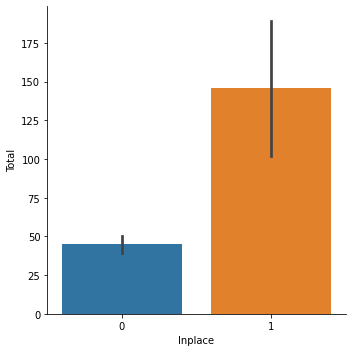

In [ ]:
plt.figure(figsize=(5,5))
sns.catplot(x='Inplace',y='Total',data=df_1,kind='bar')


plt.show()



---


>  First assumption : The total number of medals *when hosting* is more than the number of medals *when not hosting*




---



Now it is time to start the real analysis

# Data Analysis

Ploting each country at a time

Australia


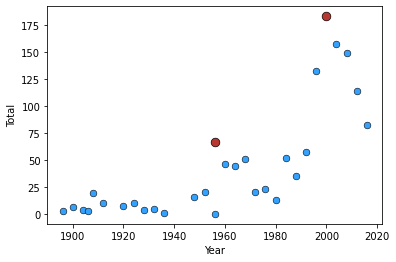

Belgium


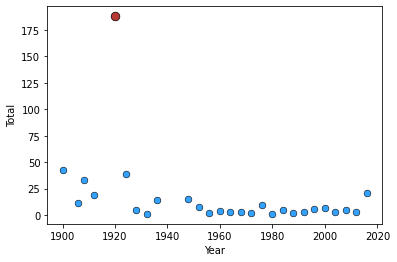

Brazil


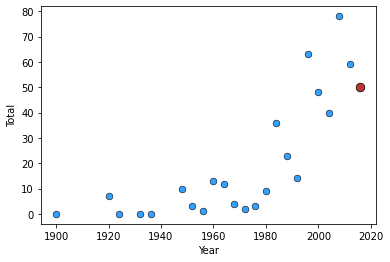

Canada


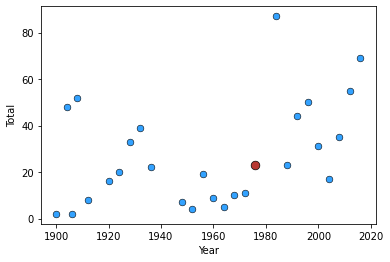

China


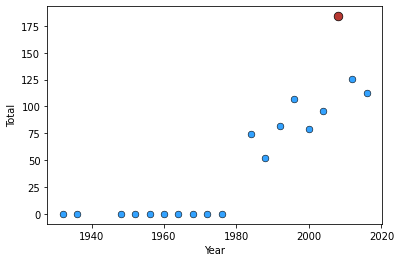

Finland


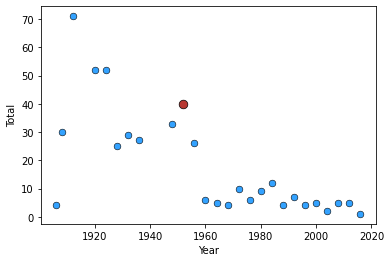

France


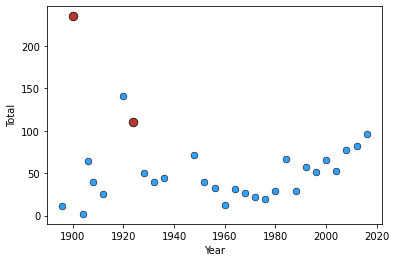

Germany


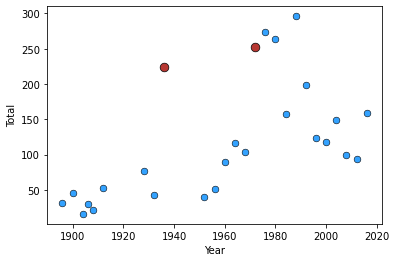

Greece


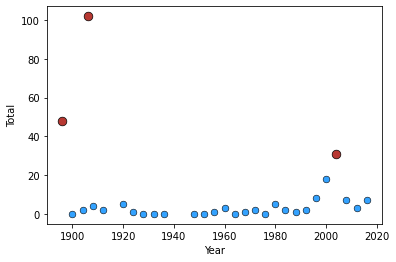

Italy


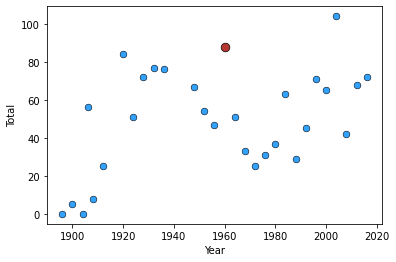

Japan


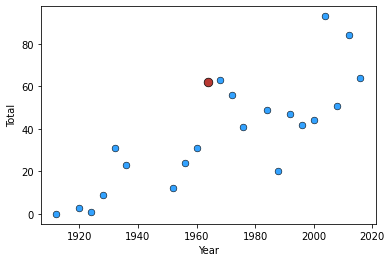

Mexico


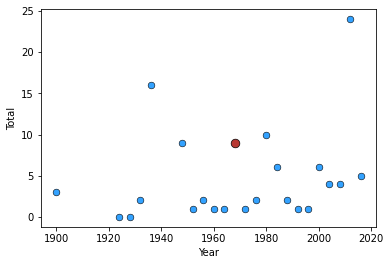

Netherlands


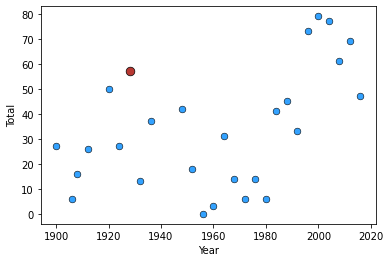

Russia


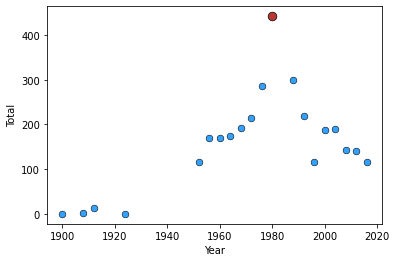

South Korea


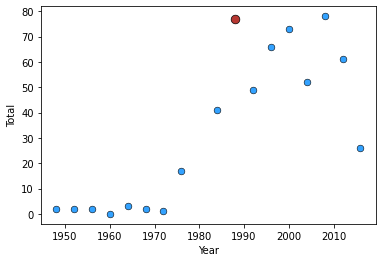

Spain


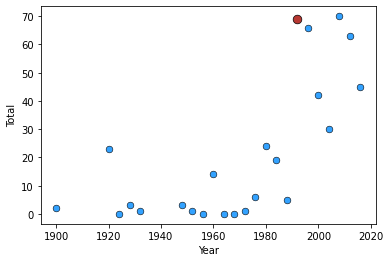

Sweden


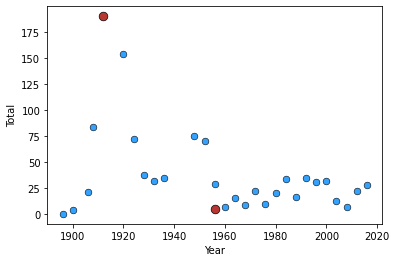

USA


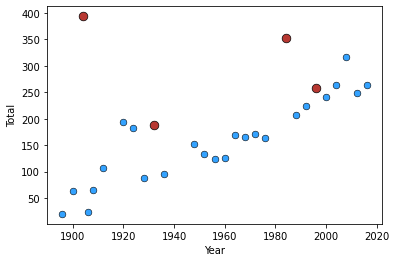

In [ ]:
for i in host_list:
  plt.figure(i)
  print(i)
  #sns.catplot(x='Inplace',y='Total',data=df_1[df_1['Country']==i],kind='bar',hue='Inplace',col='Year',legend=i)
  sns.scatterplot(data=df_1[df_1['Country']==i].query("Inplace == '0'"), x='Year', y='Total', s=45, ec='black', color='#33A2FF')
  sns.scatterplot(data=df_1[df_1['Country']==i].query("Inplace == '1'"), x='Year', y='Total', s=75, ec='black', color='#B73832')

  plt.show()

There is a first impression that the overall performance is better when a country is hosting. 
Now I will compare the mean of each country when hosting versus when it plays outside its territory

In [ ]:
df_mean = df_1[['Country',
                'Total',
                'Inplace']].groupby(
                    by=['Inplace',
                        'Country']).agg(Mean = ('Total','mean'))

In [ ]:
df_mean.reset_index(inplace=True)

In [ ]:
df_mean = df_mean[df_mean['Country'].isin(host_list)]

In [ ]:
df_mean.sort_values(by='Country').reset_index().transpose().drop(index='index')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Inplace,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
Country,Australia,Australia,Belgium,Belgium,Brazil,Brazil,Canada,Canada,China,China,Finland,Finland,France,France,Germany,Germany,Greece,Greece,Italy,Italy,Japan,Japan,Mexico,Mexico,Netherlands,Netherlands,Russia,Russia,South Korea,South Korea,Spain,Spain,Sweden,Sweden,USA,USA
Mean,38.6786,125,10.2692,188,19.3182,50,23,27.6154,184,40.5,17.36,40,172.5,47.4815,110.375,238.5,2.84615,60.3333,48.5,88,62,37.5238,9,4.59091,33.1154,57,442,144.526,77,29.6875,69,19,97.5,33.8148,158.667,298.5


In [ ]:
df_mean.sort_values(by='Country',inplace=True)
df_mean.reset_index(inplace=True)
df_mean.drop(columns='index',inplace=True)

In [ ]:
df_mean

,Inplace,Country,Mean
0,0,Australia,38.678571
1,1,Australia,125.000000
2,0,Belgium,10.269231
3,1,Belgium,188.000000
4,0,Brazil,19.318182
5,1,Brazil,50.000000
6,1,Canada,23.000000
7,0,Canada,27.615385
8,1,China,184.000000
9,0,China,40.500000


Australia


<Figure size 1080x432 with 0 Axes>

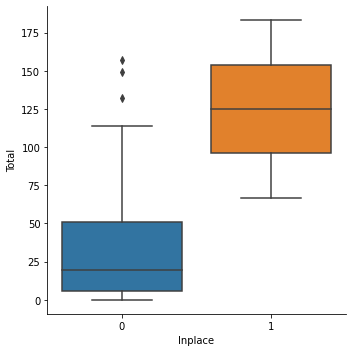

Belgium


<Figure size 1080x432 with 0 Axes>

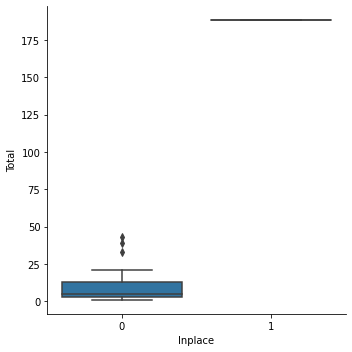

Brazil


<Figure size 1080x432 with 0 Axes>

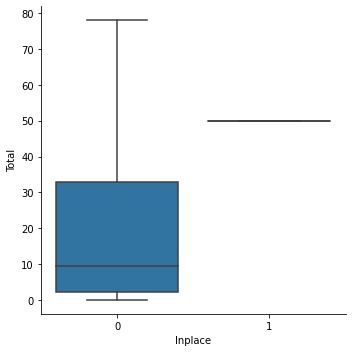

Canada


<Figure size 1080x432 with 0 Axes>

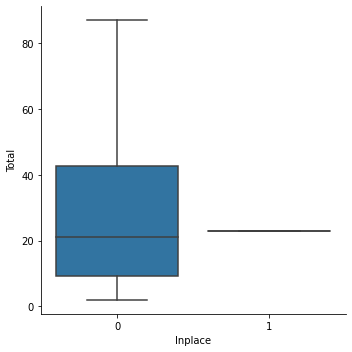

China


<Figure size 1080x432 with 0 Axes>

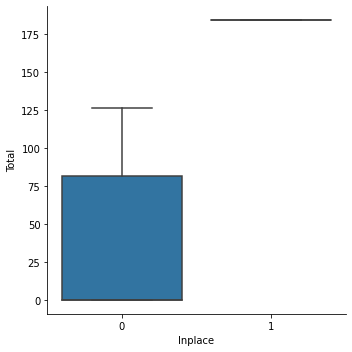

Finland


<Figure size 1080x432 with 0 Axes>

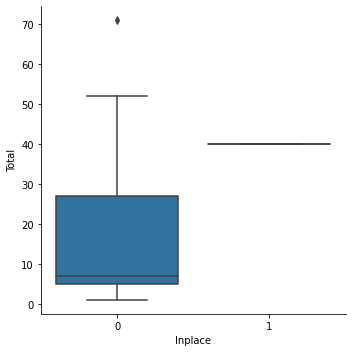

France


<Figure size 1080x432 with 0 Axes>

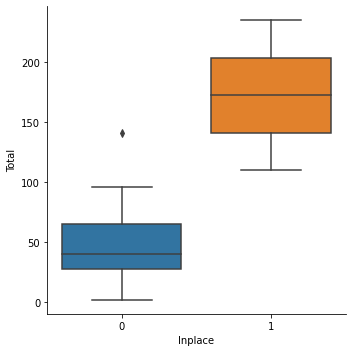

Germany


<Figure size 1080x432 with 0 Axes>

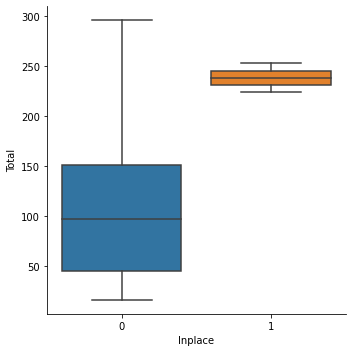

Greece


<Figure size 1080x432 with 0 Axes>

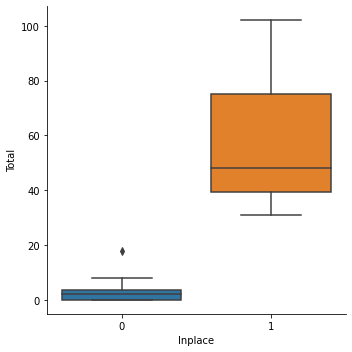

Italy


<Figure size 1080x432 with 0 Axes>

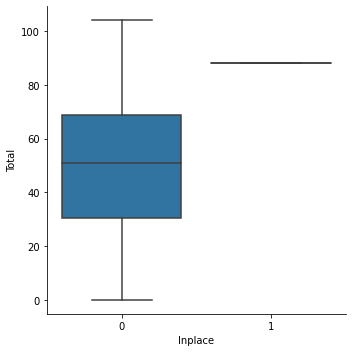

Japan


<Figure size 1080x432 with 0 Axes>

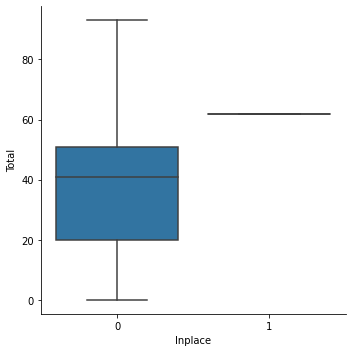

Mexico


<Figure size 1080x432 with 0 Axes>

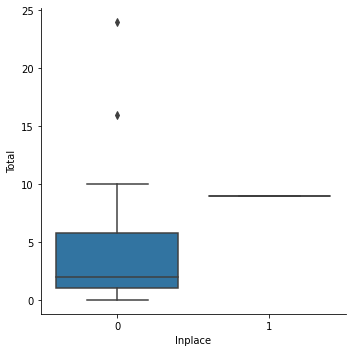

Netherlands


<Figure size 1080x432 with 0 Axes>

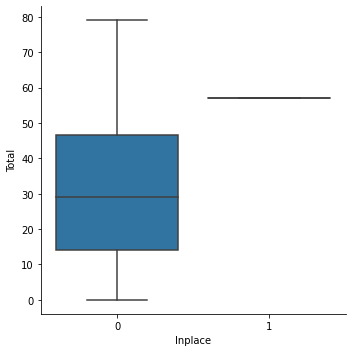

Russia


<Figure size 1080x432 with 0 Axes>

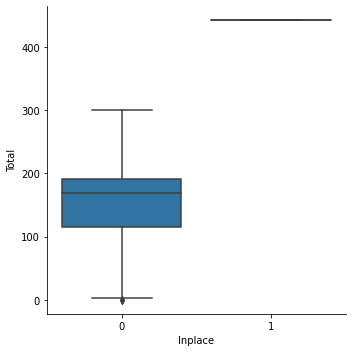

South Korea


<Figure size 1080x432 with 0 Axes>

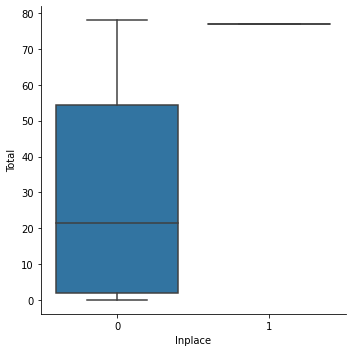

Spain


<Figure size 1080x432 with 0 Axes>

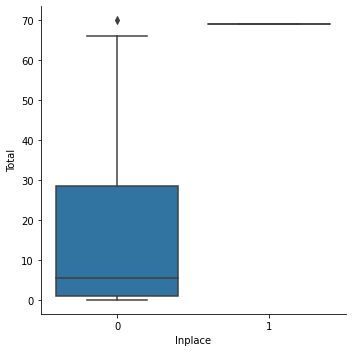

Sweden


<Figure size 1080x432 with 0 Axes>

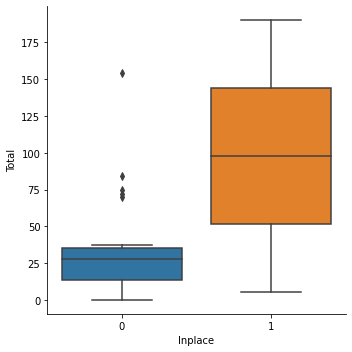

USA


<Figure size 1080x432 with 0 Axes>

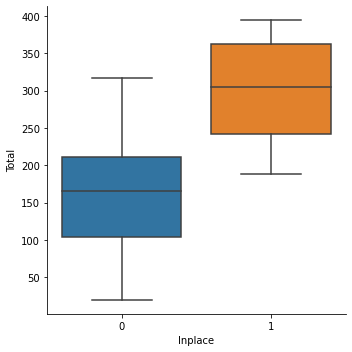

In [ ]:
for i in host_list:
  plt.figure(num=i,figsize=(15,6))
  print(i)
  sns.catplot(data=df_1[df_1['Country']==i],kind='box',x='Inplace',y='Total')
  plt.show()
  
  

---------------------------- 

Australia
---------------------------- 



<Figure size 1080x432 with 0 Axes>

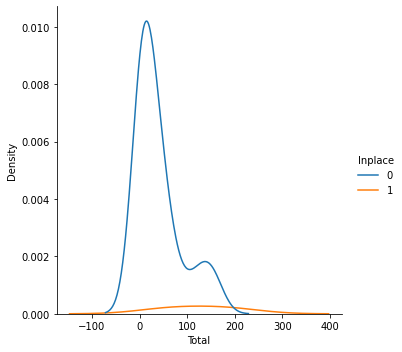

---------------------------- 

---------------------------- 

Belgium
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

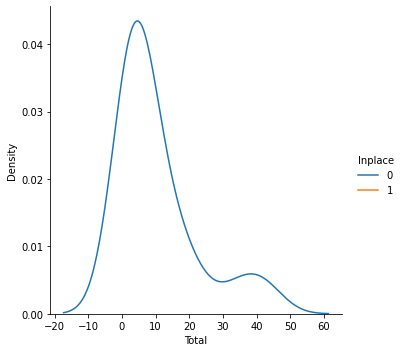

---------------------------- 

---------------------------- 

Brazil
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

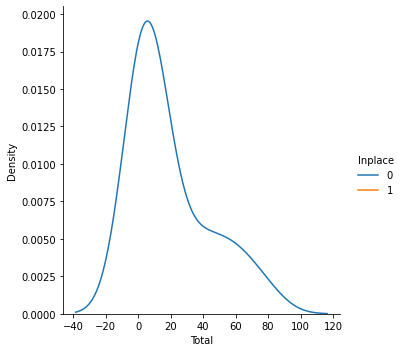

---------------------------- 

---------------------------- 

Canada
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

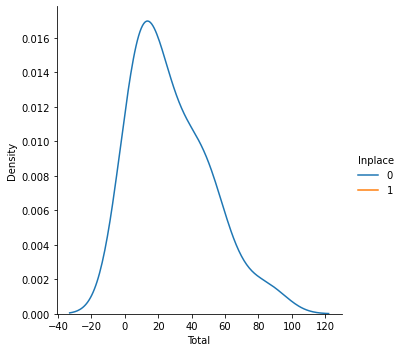

---------------------------- 

---------------------------- 

China
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

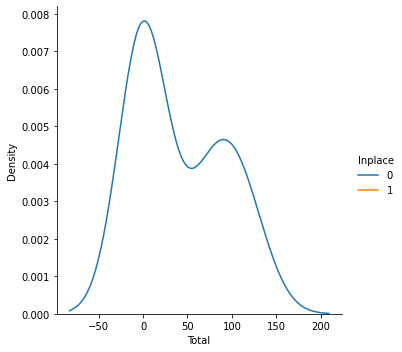

---------------------------- 

---------------------------- 

Finland
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

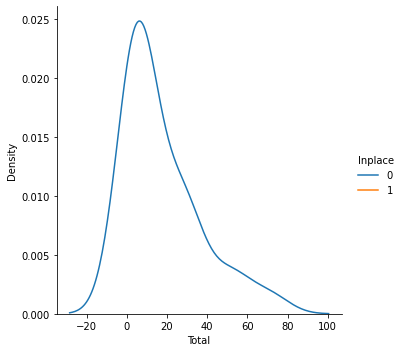

---------------------------- 

---------------------------- 

France
---------------------------- 



<Figure size 1080x432 with 0 Axes>

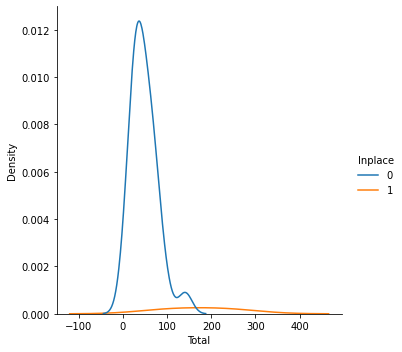

---------------------------- 

---------------------------- 

Germany
---------------------------- 



<Figure size 1080x432 with 0 Axes>

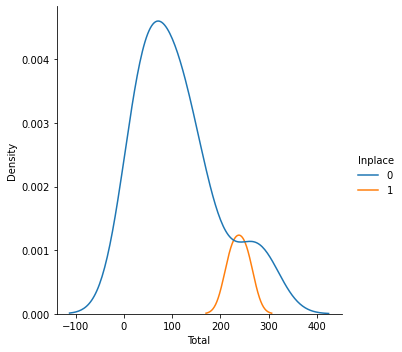

---------------------------- 

---------------------------- 

Greece
---------------------------- 



<Figure size 1080x432 with 0 Axes>

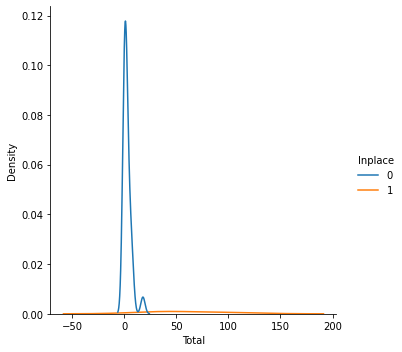

---------------------------- 

---------------------------- 

Italy
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

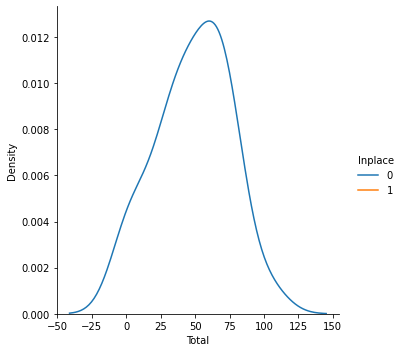

---------------------------- 

---------------------------- 

Japan
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

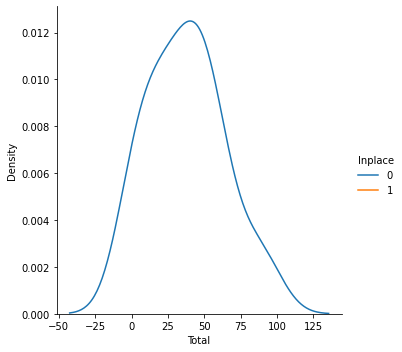

---------------------------- 

---------------------------- 

Mexico
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

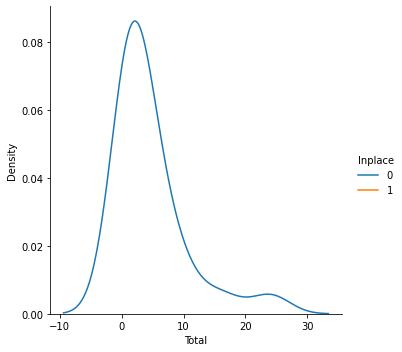

---------------------------- 

---------------------------- 

Netherlands
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

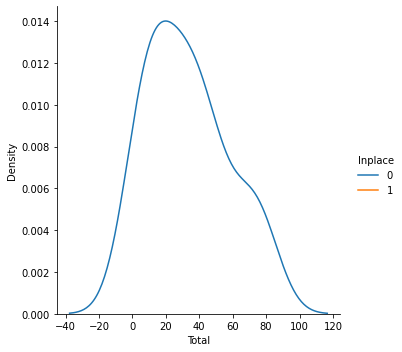

---------------------------- 

---------------------------- 

Russia
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

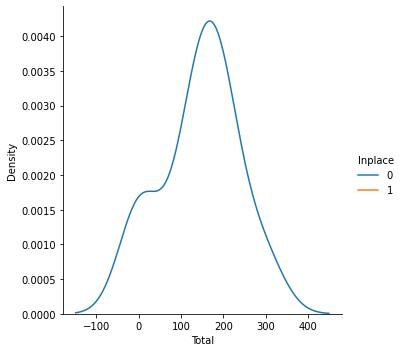

---------------------------- 

---------------------------- 

South Korea
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

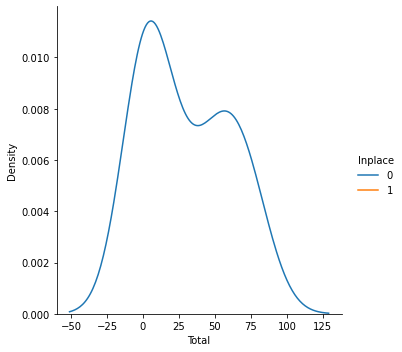

---------------------------- 

---------------------------- 

Spain
---------------------------- 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

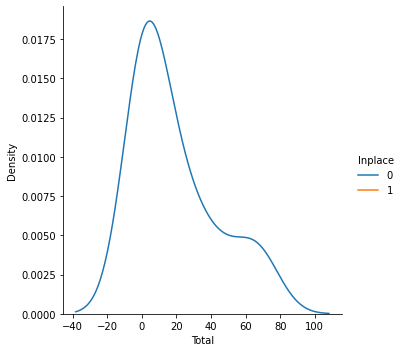

---------------------------- 

---------------------------- 

Sweden
---------------------------- 



<Figure size 1080x432 with 0 Axes>

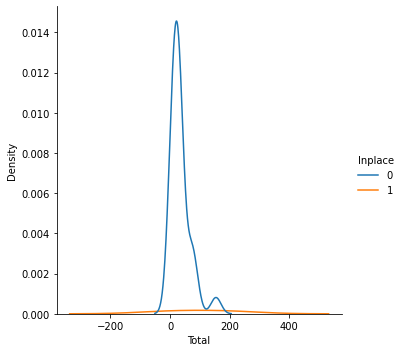

---------------------------- 

---------------------------- 

USA
---------------------------- 



<Figure size 1080x432 with 0 Axes>

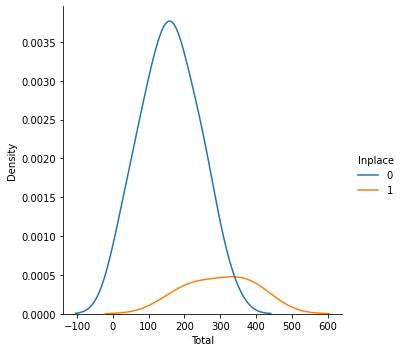

---------------------------- 



In [ ]:
for i in host_list:
    
  plt.figure(num=i,figsize=(15,6))
  print("---------------------------- \n")
  print(i)
  print("---------------------------- \n")
  sns.displot(data=df_1[df_1['Country']==i],hue='Inplace',x='Total',kind="kde")
  plt.show()
  print('---------------------------- \n')

In [ ]:
df_1

,Inplace,Country,Year,Total
111,0,Australia,1896,3
112,0,Australia,1900,6
113,0,Australia,1904,4
114,0,Australia,1906,3
115,0,Australia,1908,19
...,...,...,...,...
2766,1,Sweden,1956,5
2767,1,USA,1904,394
2768,1,USA,1932,189
2769,1,USA,1984,352


In [ ]:
df_tok.rename(columns={'NOCCode':'NOC'},inplace=True)
#[['NOCCode','Total'

In [ ]:
df_tok.head(2)

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOC
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN


In [ ]:
df_2 = df_tok[['NOC','Total']].merge(df_noc[['NOC','region']],on='NOC')

In [ ]:
df_2.rename(columns={'region':'Country'},inplace=True)

In [ ]:
df_2.shape

(92, 3)

In [ ]:
df_2['Year'] = [2020] * 92
df_2['Inplace'] = ['0'] * 92

In [ ]:
df_2.loc[df_2['Country']=='Japan','Inplace'] = '1'
#df_2.__getitem__(df_2['Country']=='Japan').__setitem__('Inplace', '1')

In [ ]:
df_2.head()

,NOC,Total,Country,Year,Inplace
0,USA,113,USA,2020,0
1,CHN,88,China,2020,0
2,JPN,58,Japan,2020,1
3,GBR,65,UK,2020,0
4,AUS,46,Australia,2020,0


In [ ]:
df_1 = pd.concat([df_1,df_2[['Inplace','Country','Year','Total']]],ignore_index=True)

In [ ]:
df_1 = df_1[df_1['Country'].isin(host_list)]

In [ ]:
df_1

,Inplace,Country,Year,Total
0,0,Australia,1896,3
1,0,Australia,1900,6
2,0,Australia,1904,4
3,0,Australia,1906,3
4,0,Australia,1908,19
...,...,...,...,...
481,0,Belgium,2020,7
488,0,Greece,2020,4
501,0,China,2020,6
536,0,Mexico,2020,4


In [ ]:
df_1.loc[df_1.Inplace==0,'Inplace'] = '0'

Australia


<Figure size 1080x432 with 0 Axes>

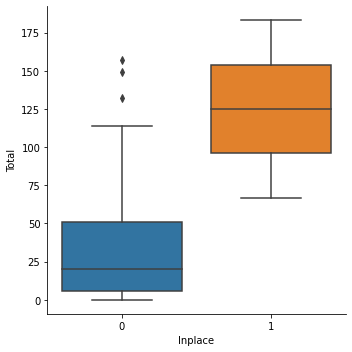

Belgium


<Figure size 1080x432 with 0 Axes>

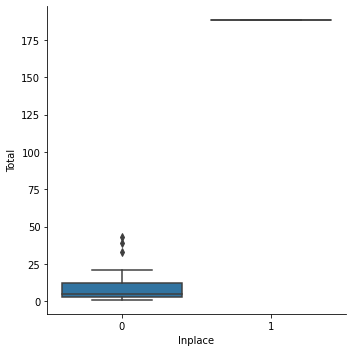

Brazil


<Figure size 1080x432 with 0 Axes>

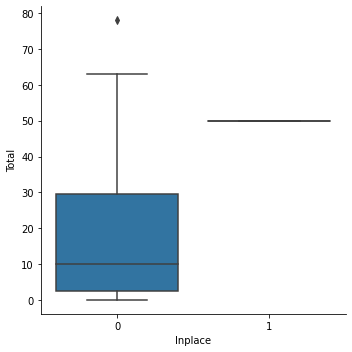

Canada


<Figure size 1080x432 with 0 Axes>

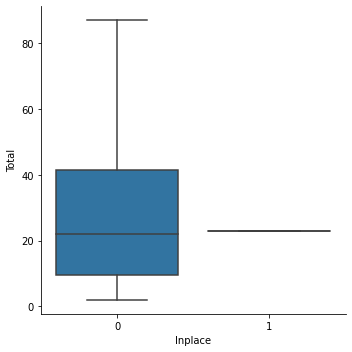

China


<Figure size 1080x432 with 0 Axes>

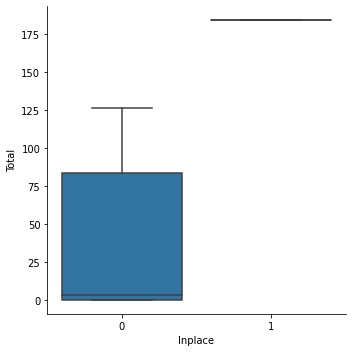

Finland


<Figure size 1080x432 with 0 Axes>

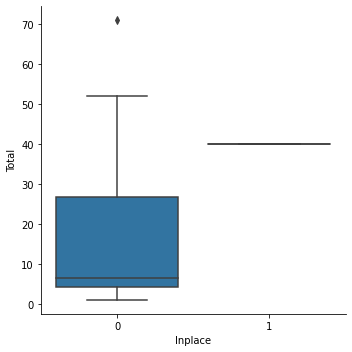

France


<Figure size 1080x432 with 0 Axes>

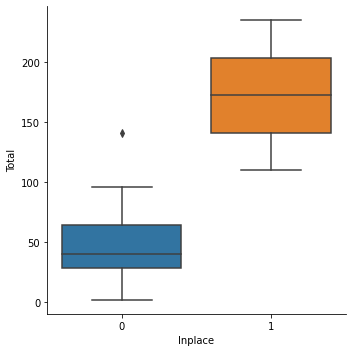

Germany


<Figure size 1080x432 with 0 Axes>

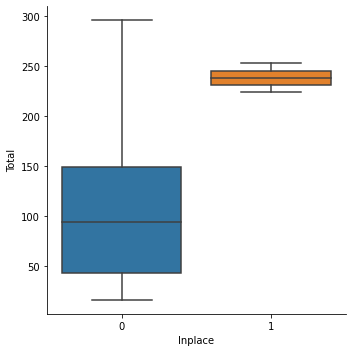

Greece


<Figure size 1080x432 with 0 Axes>

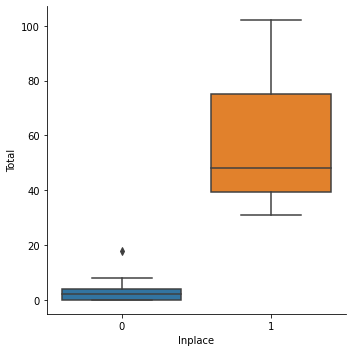

Italy


<Figure size 1080x432 with 0 Axes>

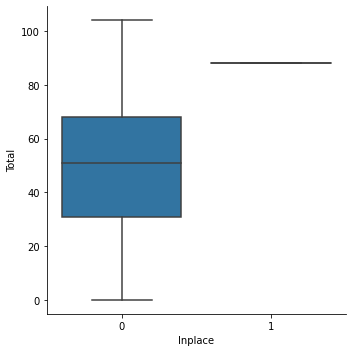

Japan


<Figure size 1080x432 with 0 Axes>

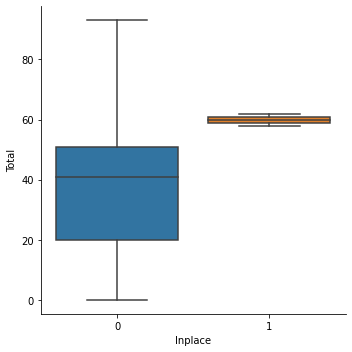

Mexico


<Figure size 1080x432 with 0 Axes>

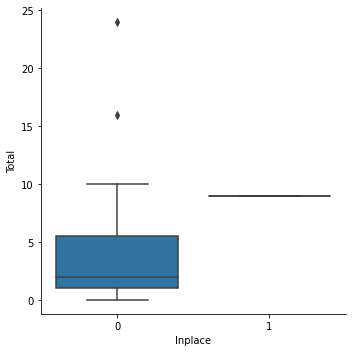

Netherlands


<Figure size 1080x432 with 0 Axes>

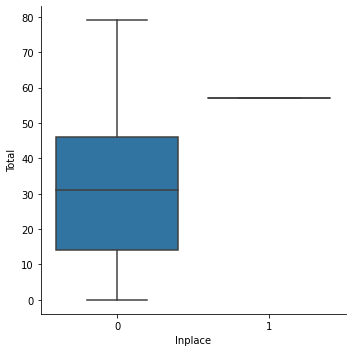

Russia


<Figure size 1080x432 with 0 Axes>

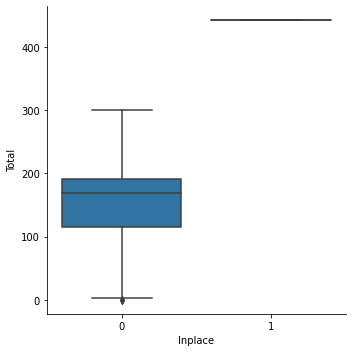

South Korea


<Figure size 1080x432 with 0 Axes>

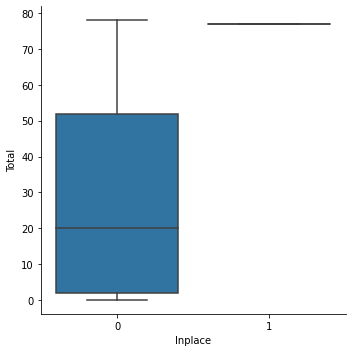

Spain


<Figure size 1080x432 with 0 Axes>

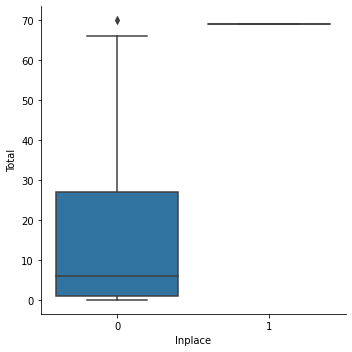

Sweden


<Figure size 1080x432 with 0 Axes>

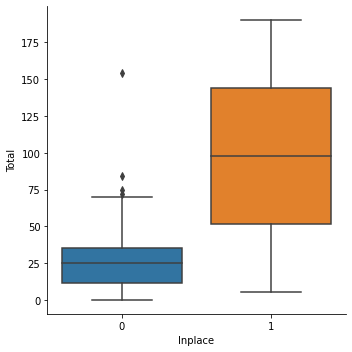

USA


<Figure size 1080x432 with 0 Axes>

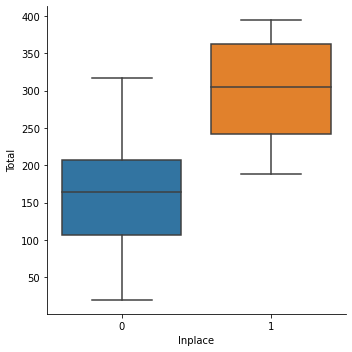

In [ ]:
for i in host_list:
  plt.figure(num=i,figsize=(15,6))
  print(i)
  sns.catplot(data=df_1[df_1['Country']==i],kind='box',x='Inplace',y='Total')
  plt.show()
  
  

---------------------------- 

Australia
---------------------------- 



<Figure size 1080x432 with 0 Axes>

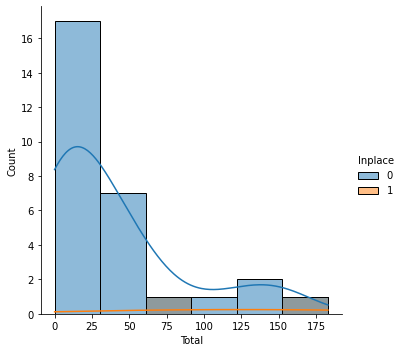

---------------------------- 

---------------------------- 

Belgium
---------------------------- 



<Figure size 1080x432 with 0 Axes>

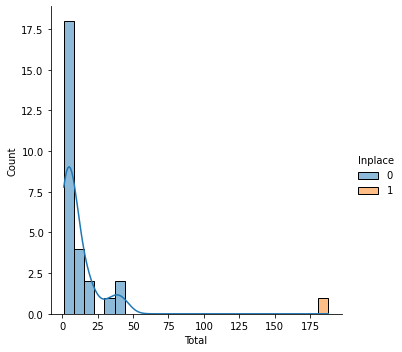

---------------------------- 

---------------------------- 

Brazil
---------------------------- 



<Figure size 1080x432 with 0 Axes>

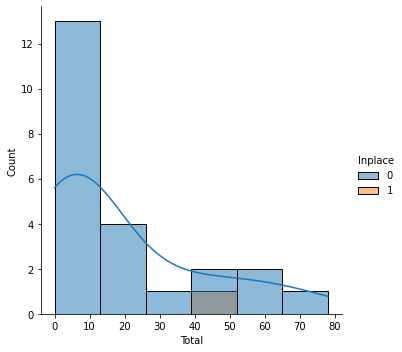

---------------------------- 

---------------------------- 

Canada
---------------------------- 



<Figure size 1080x432 with 0 Axes>

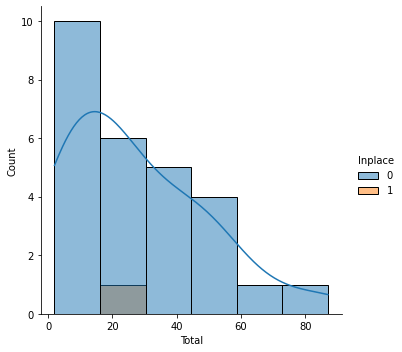

---------------------------- 

---------------------------- 

China
---------------------------- 



<Figure size 1080x432 with 0 Axes>

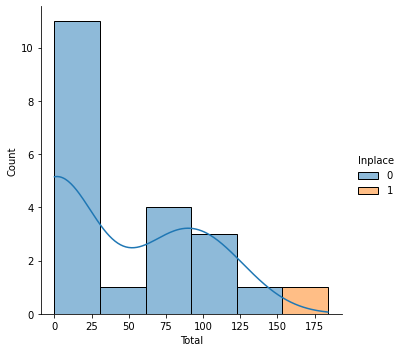

---------------------------- 

---------------------------- 

Finland
---------------------------- 



<Figure size 1080x432 with 0 Axes>

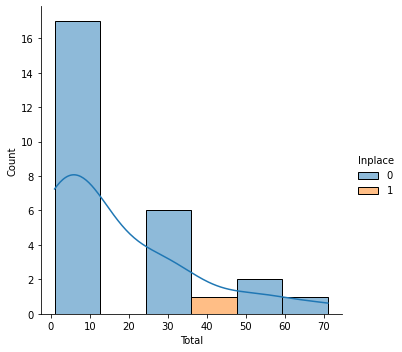

---------------------------- 

---------------------------- 

France
---------------------------- 



<Figure size 1080x432 with 0 Axes>

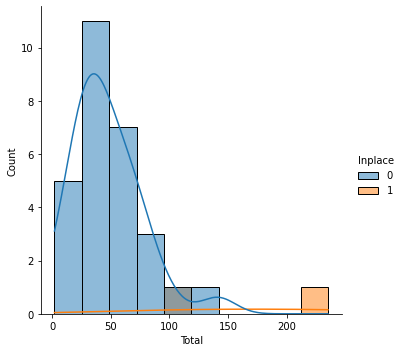

---------------------------- 

---------------------------- 

Germany
---------------------------- 



<Figure size 1080x432 with 0 Axes>

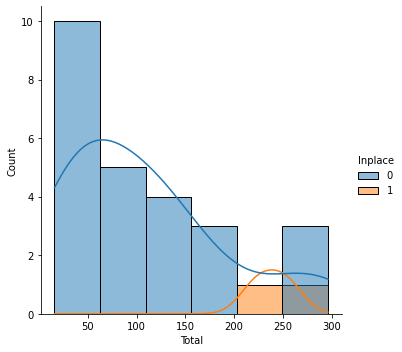

---------------------------- 

---------------------------- 

Greece
---------------------------- 



<Figure size 1080x432 with 0 Axes>

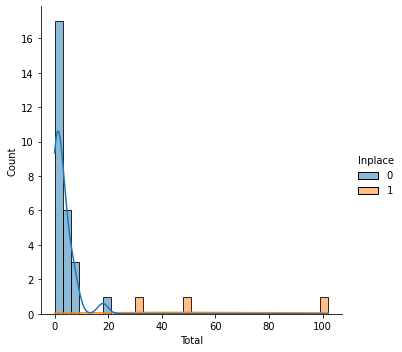

---------------------------- 

---------------------------- 

Italy
---------------------------- 



<Figure size 1080x432 with 0 Axes>

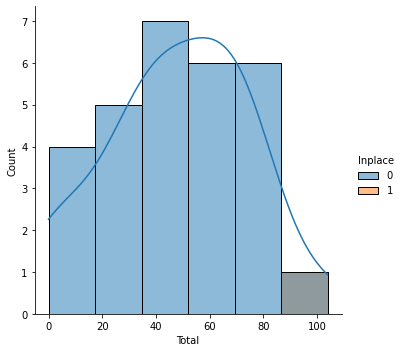

---------------------------- 

---------------------------- 

Japan
---------------------------- 



<Figure size 1080x432 with 0 Axes>

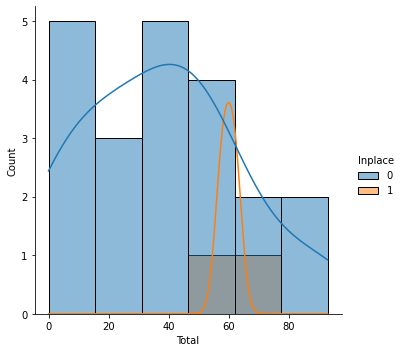

---------------------------- 

---------------------------- 

Mexico
---------------------------- 



<Figure size 1080x432 with 0 Axes>

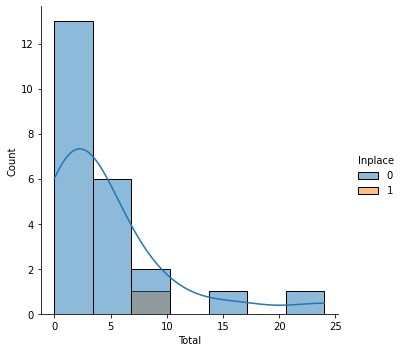

---------------------------- 

---------------------------- 

Netherlands
---------------------------- 



<Figure size 1080x432 with 0 Axes>

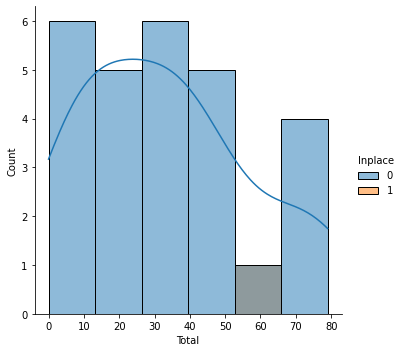

---------------------------- 

---------------------------- 

Russia
---------------------------- 



<Figure size 1080x432 with 0 Axes>

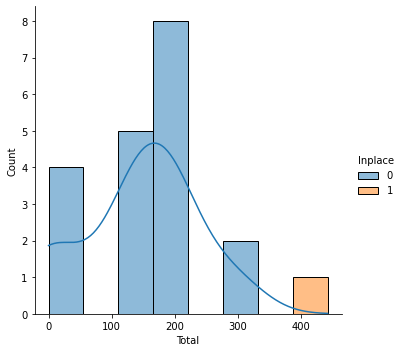

---------------------------- 

---------------------------- 

South Korea
---------------------------- 



<Figure size 1080x432 with 0 Axes>

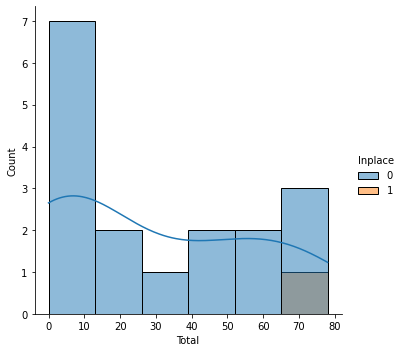

---------------------------- 

---------------------------- 

Spain
---------------------------- 



<Figure size 1080x432 with 0 Axes>

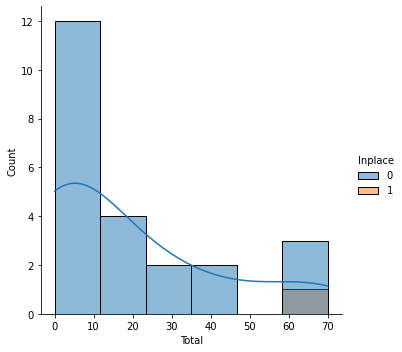

---------------------------- 

---------------------------- 

Sweden
---------------------------- 



<Figure size 1080x432 with 0 Axes>

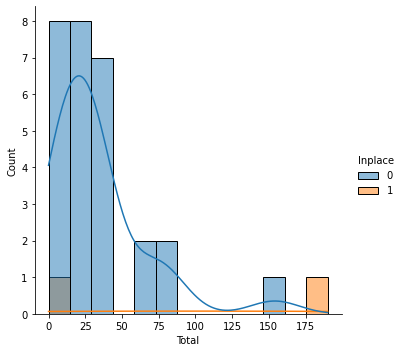

---------------------------- 

---------------------------- 

USA
---------------------------- 



<Figure size 1080x432 with 0 Axes>

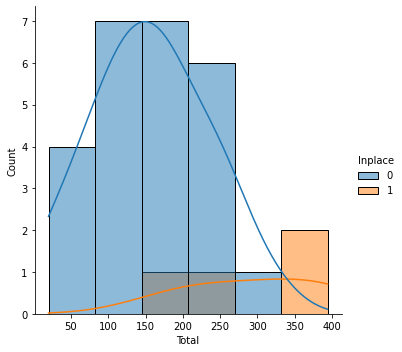

---------------------------- 



In [ ]:
for i in host_list:
    
  plt.figure(num=i,figsize=(15,6))
  print("---------------------------- \n")
  print(i)
  print("---------------------------- \n")
  sns.displot(data=df_1[df_1['Country']==i],hue='Inplace',x='Total',kde=True)
  plt.show()
  print('---------------------------- \n')

In [ ]:
inplace_mean = df_1[df_1['Inplace']=='1']['Total'].mean()
inplace_std = df_1[df_1['Inplace']=='1']['Total'].std()

out_mean = df_1[df_1['Inplace']=='0']['Total'].mean()
out_std = df_1[df_1['Inplace']=='0']['Total'].std()

inplace_size = df_1[df_1['Inplace']=='1'].shape[0]
out_size = df_1[df_1['Inplace']=='0'].shape[0]

std_error_inplace = inplace_std / np.sqrt(inplace_size)
std_error_out = out_std / np.sqrt(out_size)
mean_diff = inplace_mean - out_mean


In [ ]:
inplace_std

118.80562467756506

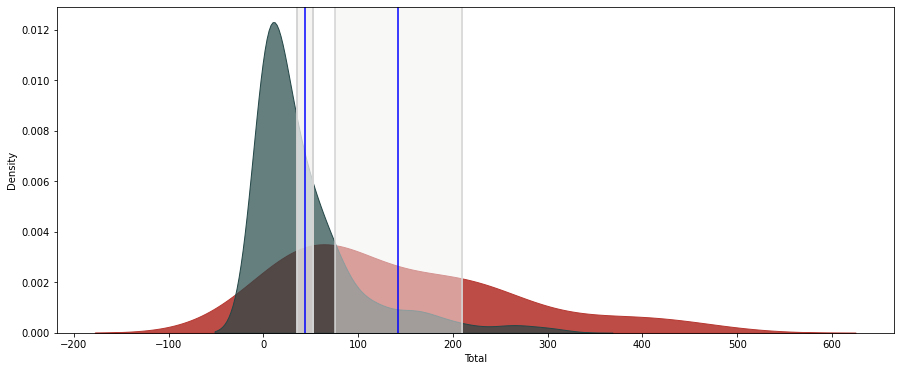

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df_1.query("Inplace == '1'"), x='Total',shade=True,color='#B73832',alpha=0.9)
sns.kdeplot(data=df_1.query("Inplace == '0'"), x='Total', shade=True, color='#244747',alpha=0.7)
plt.axvline(color='lightgray',x=out_mean+(3*std_error_out))
plt.axvline(color='lightgray',x=out_mean-(3*std_error_out))
plt.axvspan(out_mean-(3*std_error_out),
           out_mean+(3*std_error_out),
           alpha=0.5, color='#f3f2f1')
plt.axvline(color='lightgray',x=out_mean+(3*std_error_out))
plt.axvline(color='lightgray',x=out_mean-(3*std_error_out))
plt.axvspan(out_mean-(3*std_error_out),
           out_mean+(3*std_error_out),
           alpha=0.5, color='#f3f2f1')

plt.axvline(color='lightgray',x=inplace_mean+(3*std_error_inplace))
plt.axvline(color='lightgray',x=inplace_mean-(3*std_error_inplace))
plt.axvspan(inplace_mean-(3*std_error_inplace),
           inplace_mean+(3*std_error_inplace),
           alpha=0.5, color='#f3f2f1')

plt.axvline(color='blue',x=inplace_mean)
plt.axvline(color='blue',x=out_mean)



plt.show()

In [ ]:
from statsmodels.stats.weightstats import ttest_ind

H0: difference in means equal to 0

In [ ]:
t_stat_1, p_value_1, d_f_1 = ttest_ind(df_1[df_1['Inplace']=='1']['Total'],
                               df_1[df_1['Inplace']=='0']['Total'],
                               alternative="two-sided",
                               usevar="unequal")

In [ ]:
t_stat_1, p_value_1 

(4.342792219622717, 0.00016849468278805994)

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(df_1[df_1['Inplace']=='1']['Total'], df_1[df_1['Inplace']=='0']['Total'],equal_var=False)

Ttest_indResult(statistic=4.342792219622717, pvalue=0.0001684946827880598)